In [1]:
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


# Load data  
data=pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


C:\Users\Shalu Mary Abraham\AppData\Local\Temp\ipykernel_15796\3105394418.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


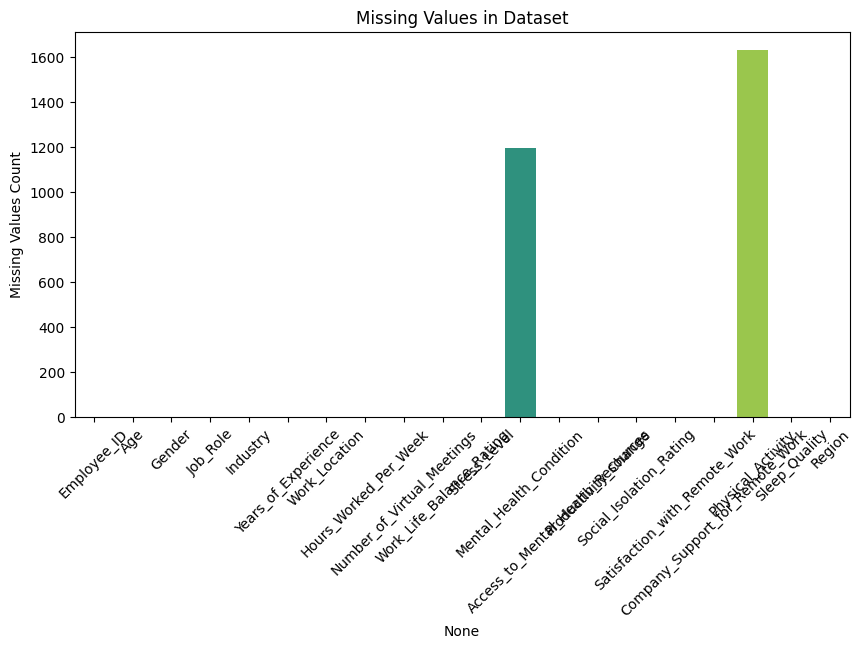

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values
df=pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
missing_values = df.isnull().sum()

# Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Dataset")
plt.show()

# Display missing values count
missing_values

# Drop missing values
df.dropna(inplace=True)

In [5]:
# Handle missing values

# Fill missing race values with the most frequent category (mode)
df['Satisfaction_with_Remote_Work'].fillna(df['Satisfaction_with_Remote_Work'].mode()[0], inplace=True)

# Drop rows where Company support for Remote Work is missing (assuming it's the target variable)
df.dropna(subset=['Company_Support_for_Remote_Work'], inplace=True)

# Verify missing values after handling
df.isnull().sum()

C:\Users\Shalu Mary Abraham\AppData\Local\Temp\ipykernel_15796\2144136482.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction_with_Remote_Work'].fillna(df['Satisfaction_with_Remote_Work'].mode()[0], inplace=True)


Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

C:\Users\Shalu Mary Abraham\AppData\Local\Temp\ipykernel_15796\2942952405.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Company_Support_for_Remote_Work'], ax=axes[1, 1], palette="pastel")


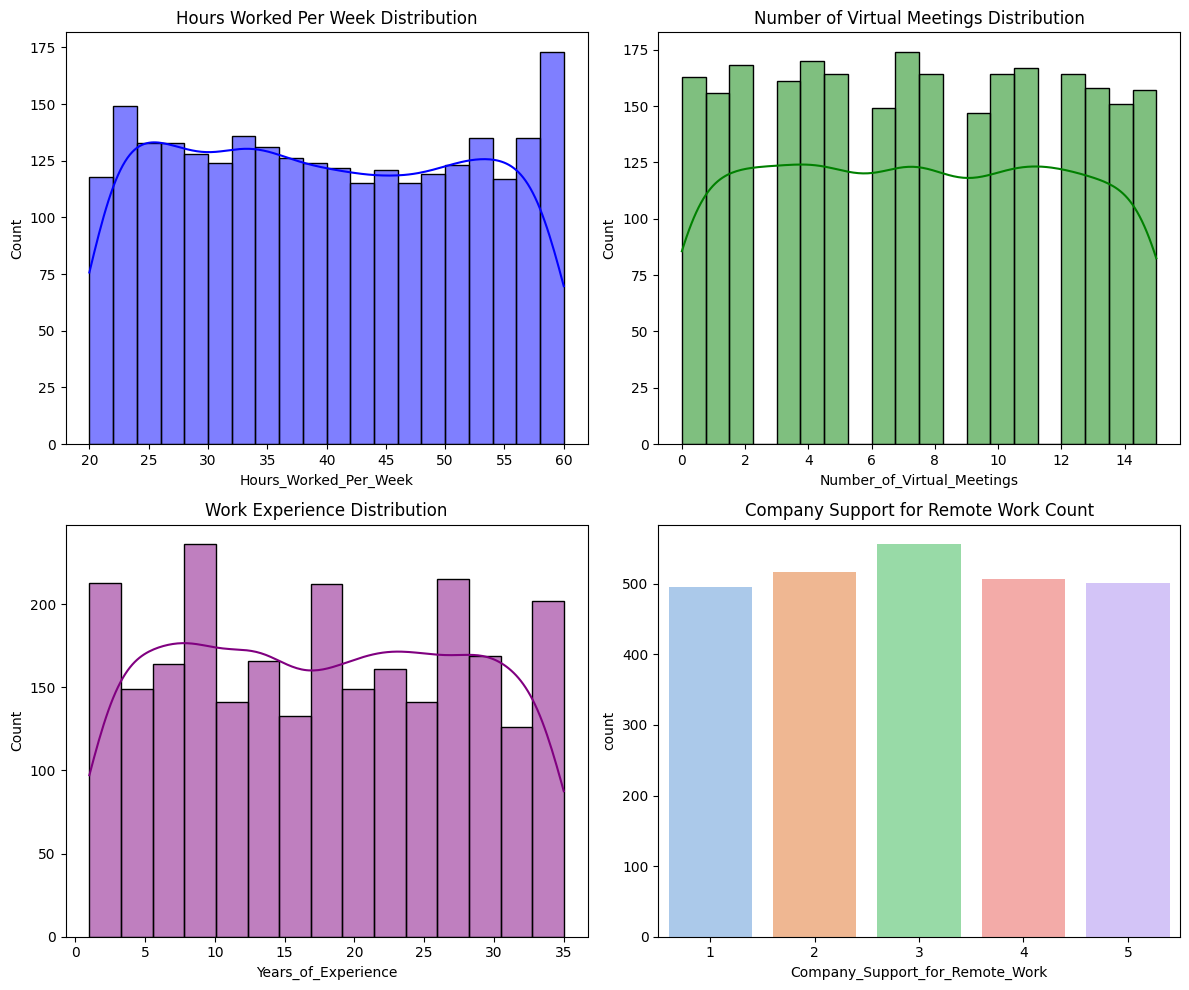

In [6]:
# Univariate Analysis: Visualizing distributions of numerical variables

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['Hours_Worked_Per_Week'], kde=True, bins=20, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Hours Worked Per Week Distribution")

sns.histplot(df['Number_of_Virtual_Meetings'], kde=True, bins=20, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Number of Virtual Meetings Distribution")

sns.histplot(df['Years_of_Experience'], kde=True, bins=15, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Work Experience Distribution")

sns.countplot(x=df['Company_Support_for_Remote_Work'], ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title("Company Support for Remote Work Count")

plt.tight_layout()
plt.show()


C:\Users\Shalu Mary Abraham\AppData\Local\Temp\ipykernel_15796\3115379782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company_Support_for_Remote_Work', y='Hours_Worked_Per_Week', data=df, ax=axes[0], palette="coolwarm")
C:\Users\Shalu Mary Abraham\AppData\Local\Temp\ipykernel_15796\3115379782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company_Support_for_Remote_Work', y='Number_of_Virtual_Meetings', data=df, ax=axes[1], palette="coolwarm")
C:\Users\Shalu Mary Abraham\AppData\Local\Temp\ipykernel_15796\3115379782.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

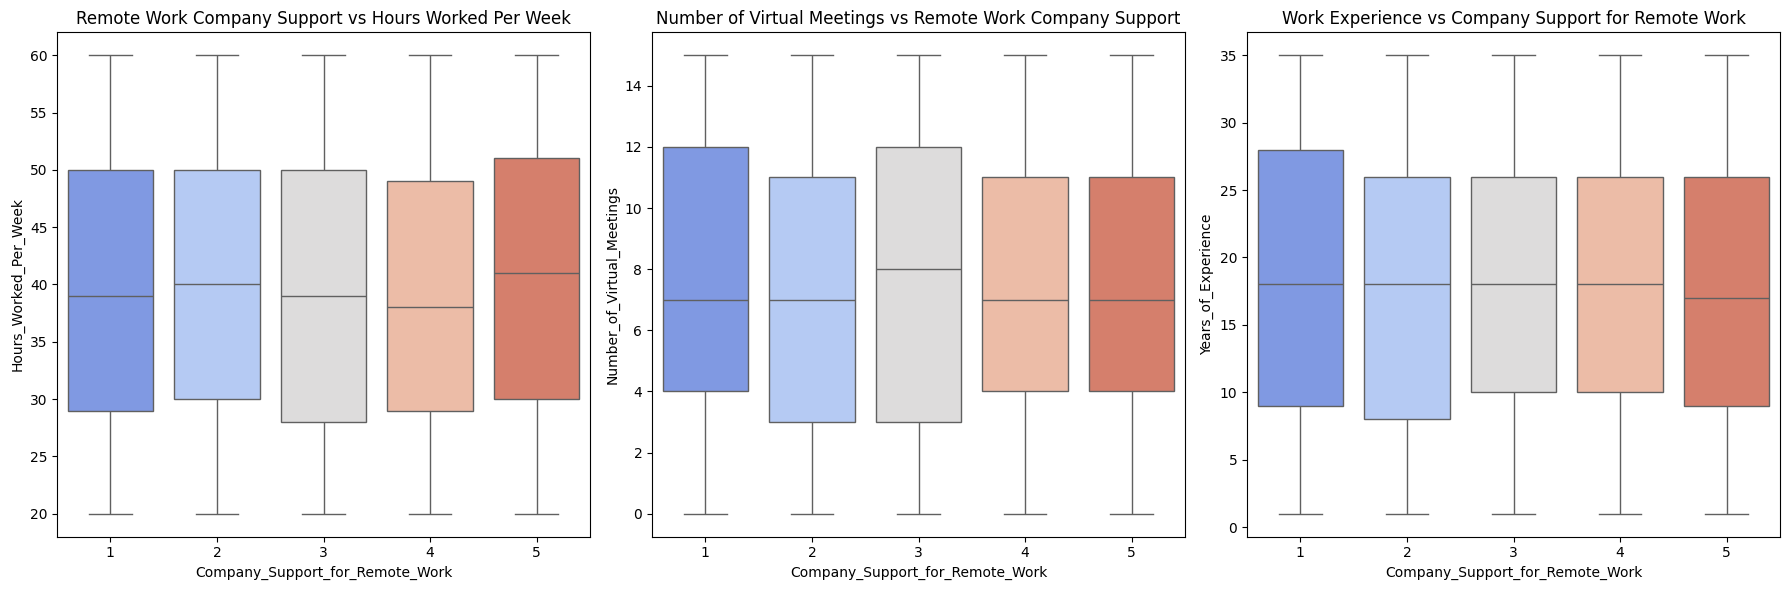

In [7]:
# Bivariate Analysis: Boxplots to compare numerical features against Company Support for Remote Work Count decisions

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Company_Support_for_Remote_Work', y='Hours_Worked_Per_Week', data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Remote Work Company Support vs Hours Worked Per Week")

sns.boxplot(x='Company_Support_for_Remote_Work', y='Number_of_Virtual_Meetings', data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("Number of Virtual Meetings vs Remote Work Company Support")

sns.boxplot(x='Company_Support_for_Remote_Work', y='Years_of_Experience', data=df, ax=axes[2], palette="coolwarm")
axes[2].set_title("Work Experience vs Company Support for Remote Work")

plt.tight_layout()
plt.show()


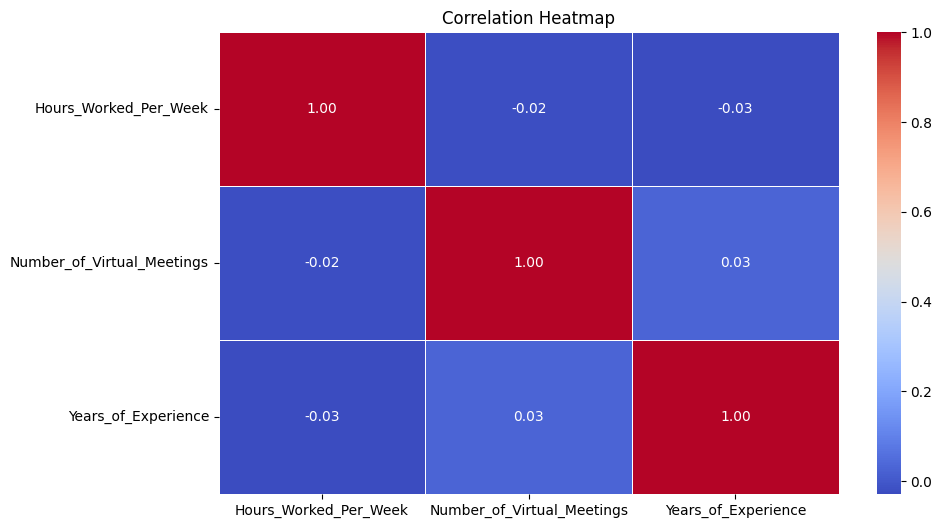

In [8]:
# Multivariate Analysis: Correlation Heatmap

plt.figure(figsize=(10, 6))
corr_matrix = df[['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Years_of_Experience']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Drop the target column 'Company_Support_for_Remote_Work'
df_clustering = df.drop(columns=['Company_Support_for_Remote_Work'])

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(df_clustering.select_dtypes(include=[float, int]))

# Display the first few rows of the clustered data
df_clustering.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region,cluster
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,Weekly,Good,Europe,0
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,Weekly,Good,Asia,2
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,Daily,Poor,Asia,0
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,Weekly,Poor,North America,0
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,Weekly,Good,Europe,1


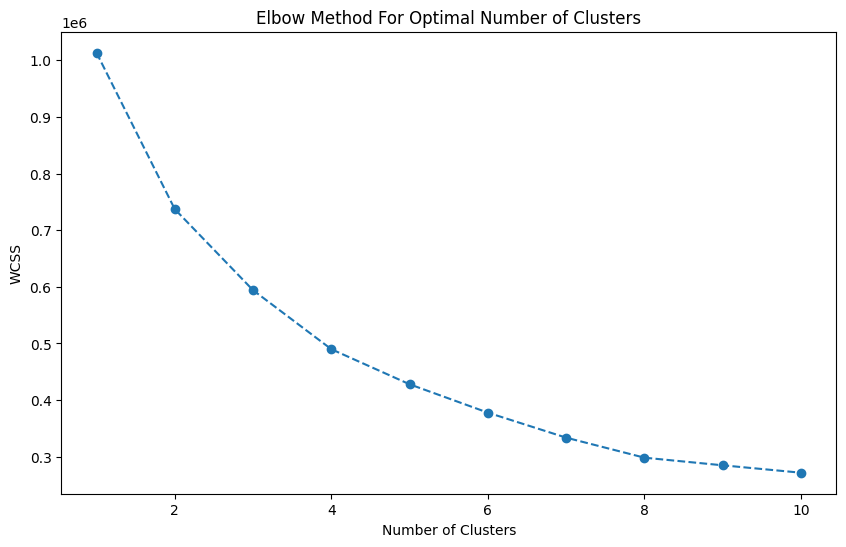

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering.select_dtypes(include=[float, int]))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_clustering.select_dtypes(include=[float, int]), df_clustering['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.23763206164907097


Cluster Centers:
         Age  Years_of_Experience  Hours_Worked_Per_Week  \
0  27.327189             9.493088              49.612903   
1  49.745098             9.803922              27.937908   
2  53.045082             8.057377              46.409836   
3  30.548387            26.695341              28.000000   
4  52.032787            25.581967              52.647541   
5  30.267797             8.827119              29.538983   
6  52.382671            27.321300              28.855596   
7  42.408889            23.884444              39.115556   
8  40.995169             9.086957              52.980676   
9  30.551237            26.946996              50.763251   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
0                    7.470046                  2.981567   
1                    7.673203                  3.179739   
2                    7.688525                  2.885246   
3                    8.139785                  2.960573   
4                    6.8770

C:\Users\Shalu Mary Abraham\AppData\Local\Temp\ipykernel_15796\2655555263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_clustering, palette='viridis')


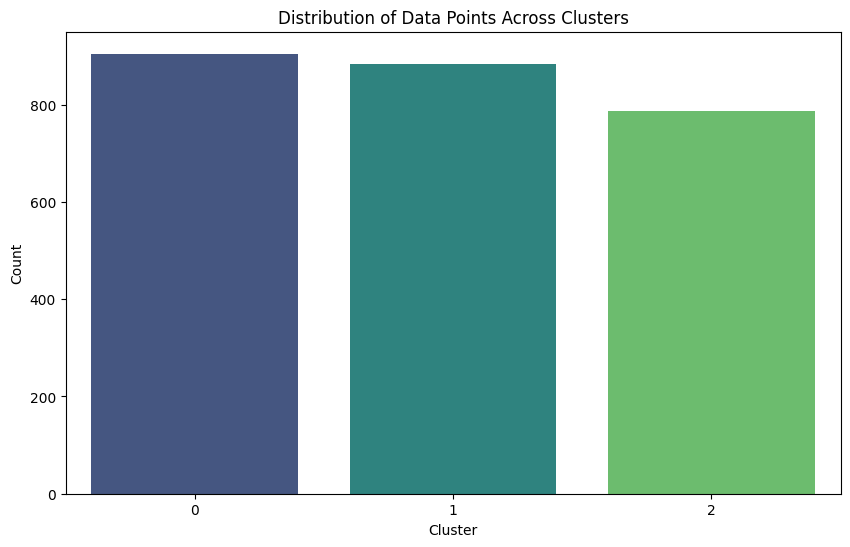

Cluster 0:
  Age: 27.33
  Years_of_Experience: 9.49
  Hours_Worked_Per_Week: 49.61
  Number_of_Virtual_Meetings: 7.47
  Work_Life_Balance_Rating: 2.98
  Social_Isolation_Rating: 3.03
  cluster: 0.01

Cluster 1:
  Age: 49.75
  Years_of_Experience: 9.80
  Hours_Worked_Per_Week: 27.94
  Number_of_Virtual_Meetings: 7.67
  Work_Life_Balance_Rating: 3.18
  Social_Isolation_Rating: 2.95
  cluster: 1.00

Cluster 2:
  Age: 53.05
  Years_of_Experience: 8.06
  Hours_Worked_Per_Week: 46.41
  Number_of_Virtual_Meetings: 7.69
  Work_Life_Balance_Rating: 2.89
  Social_Isolation_Rating: 2.83
  cluster: 1.90

Cluster 3:
  Age: 30.55
  Years_of_Experience: 26.70
  Hours_Worked_Per_Week: 28.00
  Number_of_Virtual_Meetings: 8.14
  Work_Life_Balance_Rating: 2.96
  Social_Isolation_Rating: 3.08
  cluster: 0.41

Cluster 4:
  Age: 52.03
  Years_of_Experience: 25.58
  Hours_Worked_Per_Week: 52.65
  Number_of_Virtual_Meetings: 6.88
  Work_Life_Balance_Rating: 2.94
  Social_Isolation_Rating: 3.00
  cluster: 2.00

In [12]:
# Display cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_clustering.select_dtypes(include=[float, int]).columns)
print("Cluster Centers:")
print(cluster_centers_df)

# Visualize the distribution of data points across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df_clustering, palette='viridis')
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Interpretation of clusters
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}:")
    for j, col in enumerate(df_clustering.select_dtypes(include=[float, int]).columns):
        print(f"  {col}: {center[j]:.2f}")
    print()

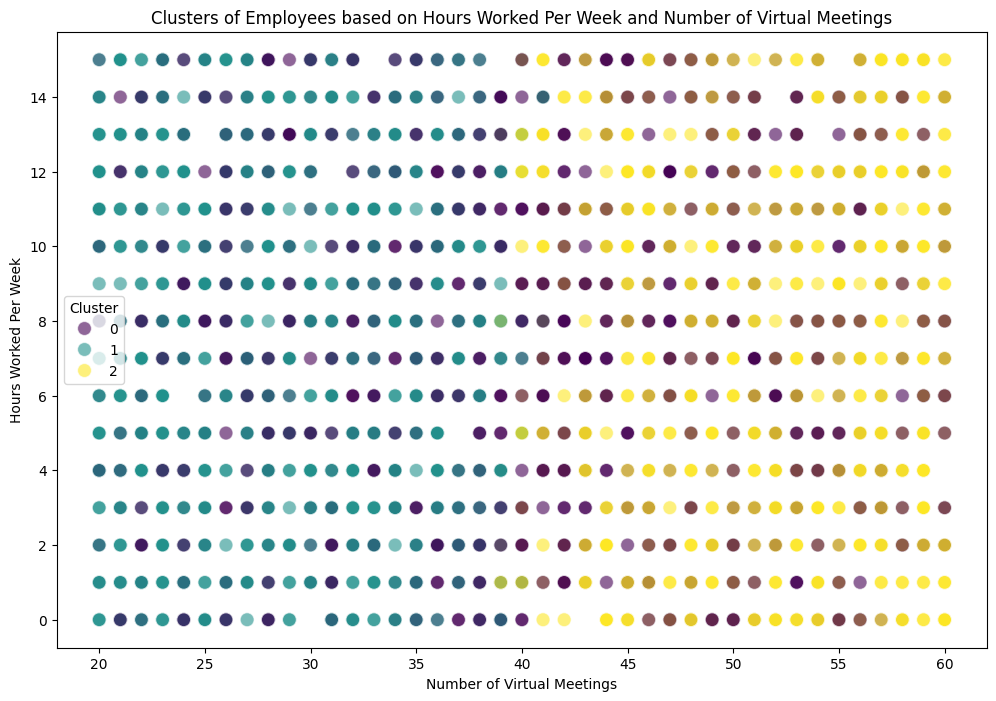

In [16]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Hours_Worked_Per_Week', y='Number_of_Virtual_Meetings', hue='cluster', data=df_clustering, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters of Employees based on Hours Worked Per Week and Number of Virtual Meetings')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Hours Worked Per Week')
plt.legend(title='Cluster')
plt.show()

In [17]:
# Interpretation for Elbow Method
print("Interpretation of the Elbow Method:")
print("In this plot, the 'elbow' appears to be at k = 3, indicating that 3 clusters might be the optimal choice.\n")

#Interpretation of Silhouette Score
print("Interpretation of Silhouette Score:")
print("The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.")
print("The score ranges from -1 to 1, where a higher value indicates better clustering.")
print("A score of 0.23763206164907097 suggests that the clusters are reasonably well-defined.")
print("Scores above 0.5 are generally considered good, while scores below 0.2 may indicate that the clusters are not well-separated.\n")

# Interpretation of Cluster Centers
print("Interpretation of Cluster Centers:")
print("The cluster centers represent the average values of the features for each cluster.")
print("Each row corresponds to a cluster, and each column corresponds to a feature.")
print("For example, the first cluster center has an average Hours Worked Per Week of 49.61, an average Number of Virtual Meetings of 7.47, and an average work experience of 9.49 years.")
print("These values help in understanding the characteristics of each cluster.\n")

Interpretation of the Elbow Method:
In this plot, the 'elbow' appears to be at k = 3, indicating that 3 clusters might be the optimal choice.

Interpretation of Silhouette Score:
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
The score ranges from -1 to 1, where a higher value indicates better clustering.
A score of 0.23763206164907097 suggests that the clusters are reasonably well-defined.
Scores above 0.5 are generally considered good, while scores below 0.2 may indicate that the clusters are not well-separated.

Interpretation of Cluster Centers:
The cluster centers represent the average values of the features for each cluster.
Each row corresponds to a cluster, and each column corresponds to a feature.
For example, the first cluster center has an average Hours Worked Per Week of 49.61, an average Number of Virtual Meetings of 7.47, and an average work experience of 9.49 years.
These values help in understanding the characterist